# Building data 

data source : https://datadryad.org/stash/dataset/doi:10.7941/D1N33Q
data description : 
The time-series measured data collected from Building 59 can be organized into five major categories: energy use data, outdoor environmental data, indoor environmental data, HVAC operational data, and occupant data.

The entire dataset is compiled into 27 separate data files in the CSV format, containing 337 data points in total

## used data 

In [1]:
import os 
import os 
import json 
import pandas as pd 
import bson
import numpy as np

In [2]:
root_path = "./dataset/3_years/Bldg59_clean data"

In [3]:
data_path = {}
for root, dirs, files in os.walk(root_path):
    for file in files:
        data_path[file.split(".")[0]] = os.path.join(root, file)

In [4]:
data_path

{'ashp_cw': './dataset/3_years/Bldg59_clean data/ashp_cw.csv',
 'ashp_hw': './dataset/3_years/Bldg59_clean data/ashp_hw.csv',
 'ashp_meter': './dataset/3_years/Bldg59_clean data/ashp_meter.csv',
 'ele': './dataset/3_years/Bldg59_clean data/ele.csv',
 'hp_hws_temp': './dataset/3_years/Bldg59_clean data/hp_hws_temp.csv',
 'occ': './dataset/3_years/Bldg59_clean data/occ.csv',
 'rtu_econ_sp': './dataset/3_years/Bldg59_clean data/rtu_econ_sp.csv',
 'rtu_fan_spd': './dataset/3_years/Bldg59_clean data/rtu_fan_spd.csv',
 'rtu_ma_t': './dataset/3_years/Bldg59_clean data/rtu_ma_t.csv',
 'rtu_oa_damper': './dataset/3_years/Bldg59_clean data/rtu_oa_damper.csv',
 'rtu_oa_fr': './dataset/3_years/Bldg59_clean data/rtu_oa_fr.csv',
 'rtu_oa_t': './dataset/3_years/Bldg59_clean data/rtu_oa_t.csv',
 'rtu_plenum_p': './dataset/3_years/Bldg59_clean data/rtu_plenum_p.csv',
 'rtu_ra_t': './dataset/3_years/Bldg59_clean data/rtu_ra_t.csv',
 'rtu_sa_fr': './dataset/3_years/Bldg59_clean data/rtu_sa_fr.csv',
 'rtu

Energy and HVAC energy:

ele.csv

Outdoor Temperature:

site_weather.csv        

Indoor Temperature:

zone_temp_interior.csv

Ocuppancy:

occ.csv

In [5]:
tmp1 = pd.read_csv(data_path["occ"])
tmp2 = pd.read_csv(data_path["wifi"])

In [8]:
elec_data = pd.read_csv(data_path["ele"])
outdoor_temp = pd.read_csv(data_path["site_weather"])
indoor_temp = pd.read_csv(data_path["zone_temp_interior"])
count_data = pd.read_csv(data_path["occ"])
count_data_1 = pd.read_csv(data_path["wifi"])

elec_data["date"] = pd.to_datetime(elec_data.date)
outdoor_temp["date"] = pd.to_datetime(outdoor_temp.date)
indoor_temp["date"] = pd.to_datetime(indoor_temp.date)
count_data["date"] = pd.to_datetime(count_data.date)
count_data_1["date"] = pd.to_datetime(count_data_1.date)


count_data["total_occ"] = count_data.sum(axis= 1)
count_data.drop("occ_third_south", axis=1, inplace=True)
count_data.drop("occ_fourth_south", axis=1, inplace=True)

count_data_1.fillna(0)
count_data_1["total_occ"] = count_data_1.sum(axis= 1)
count_data_1["total_occ"].apply(np.int)
count_data_1.drop("wifi_first_south", axis=1, inplace=True)
count_data_1.drop("wifi_second_south", axis=1, inplace=True)
count_data_1.drop("wifi_third_south", axis=1, inplace=True)
count_data_1.drop("wifi_fourth_south", axis=1, inplace=True)

count_data_res = pd.merge(count_data, count_data_1, how="inner", on="date")
count_data_res["total_occ"] = count_data_res.sum(axis= 1)
count_data_res.drop("total_occ_x", axis=1, inplace=True)
count_data_res.drop("total_occ_y", axis=1, inplace=True)

elec_data["total_elec"] = elec_data.sum(axis=1) # kW
elec_data.drop("mels_S", axis=1, inplace=True)
elec_data.drop("lig_S", axis=1, inplace=True)
elec_data.drop("mels_N", axis=1, inplace=True)
elec_data.drop("hvac_N", axis=1, inplace=True)
elec_data.drop("hvac_S", axis=1, inplace=True)
elec_data.drop("Unnamed: 6", axis=1, inplace=True)


outdoor_temp["out_avg_temp"] = outdoor_temp[["air_temp_set_1","air_temp_set_2"]].mean(axis=1)
outdoor_temp.drop("air_temp_set_1", axis=1, inplace=True)
outdoor_temp.drop("air_temp_set_2", axis=1, inplace=True)
outdoor_temp.drop("dew_point_temperature_set_1d", axis=1, inplace=True)
outdoor_temp.drop("relative_humidity_set_1", axis=1, inplace=True)
outdoor_temp.drop("solar_radiation_set_1", axis=1, inplace=True)


/tmp/ipykernel_106485/984377132.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  count_data["total_occ"] = count_data.sum(axis= 1)
/tmp/ipykernel_106485/984377132.py:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  count_data_1["total_occ"] = count_data_1.sum(axis= 1)
/tmp/ipykernel_106485/984377132.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for a

In [12]:
count_data_res

,date,total_occ
0,2018-05-22 07:00:00,76.0
1,2018-05-22 07:10:00,74.0
2,2018-05-22 07:20:00,73.0
3,2018-05-22 07:30:00,76.0
4,2018-05-22 07:40:00,78.0
...,...,...
7297,2018-07-11 23:10:00,103.0
7298,2018-07-11 23:20:00,98.0
7299,2018-07-11 23:30:00,88.0
7300,2018-07-11 23:40:00,87.0


In [11]:
count_data

,date,total_occ
0,2018-05-22 07:00:00,0.0
1,2018-05-22 07:01:00,1.0
2,2018-05-22 07:02:00,0.0
3,2018-05-22 07:03:00,1.0
4,2018-05-22 07:04:00,0.0
...,...,...
396188,2019-02-21 10:08:00,0.0
396189,2019-02-21 10:09:00,0.0
396190,2019-02-21 10:10:00,0.0
396191,2019-02-21 10:11:00,0.0


In [13]:
big_df_1 = pd.merge(elec_data, indoor_temp, how="inner", on="date")
big_df_2 = pd.merge(outdoor_temp, count_data_res, how="inner", on="date")

In [14]:
big_df = pd.merge(big_df_1, big_df_2, how="inner", on="date")

In [58]:
big_df

,date,total_elec,cerc_templogger_1,cerc_templogger_10,cerc_templogger_11,cerc_templogger_12,cerc_templogger_13,cerc_templogger_14,cerc_templogger_15,cerc_templogger_16,cerc_templogger_2,cerc_templogger_3,cerc_templogger_4,cerc_templogger_5,cerc_templogger_6,cerc_templogger_7,cerc_templogger_8,cerc_templogger_9,out_avg_temp,total_occ
0,2018-05-22 07:00:00,61.890000,23.500,24.000,23.875,22.743818,22.562,23.312,23.812,23.625,23.000,23.937,23.250,23.562,24.312,22.937,23.500,23.125,10.035,76.0
1,2018-05-22 07:30:00,28.800000,23.375,24.062,23.875,22.726773,22.625,23.312,23.750,23.687,22.875,23.875,23.375,23.500,24.500,22.937,23.750,23.125,9.880,76.0
2,2018-05-22 08:00:00,44.490000,23.375,24.187,23.812,22.709727,22.562,23.312,23.750,23.687,22.875,23.875,23.062,23.375,24.562,22.875,23.750,23.062,9.835,88.0
3,2018-05-22 08:30:00,46.000000,23.125,24.187,23.812,22.692682,22.500,23.250,23.687,23.687,22.937,23.812,23.062,23.375,24.500,22.875,23.625,23.062,9.855,88.0
4,2018-05-22 09:00:00,64.990000,23.312,24.125,23.750,22.675636,22.250,23.187,23.625,23.625,23.000,23.750,23.125,23.250,24.562,22.812,23.500,23.062,9.840,106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2341,2018-07-11 21:30:00,122.300000,23.687,24.750,23.937,23.500000,22.562,24.437,24.187,24.625,23.500,22.812,22.875,24.312,23.625,24.187,23.562,23.187,20.625,140.0
2342,2018-07-11 22:00:00,104.200000,24.187,25.000,24.125,23.375000,23.437,24.562,25.000,24.750,23.875,23.937,22.750,22.937,24.375,24.250,24.125,23.250,19.930,138.0
2343,2018-07-11 22:30:00,126.066667,24.062,25.000,24.062,23.500000,24.062,24.750,25.312,25.125,24.000,24.125,23.062,22.875,24.687,24.000,24.250,24.625,19.375,124.0
2344,2018-07-11 23:00:00,101.700000,24.250,25.187,24.312,23.625000,24.250,24.750,25.687,25.062,23.937,24.187,23.000,23.000,24.875,24.125,24.500,24.875,19.065,109.0


In [59]:
# export data (all)
from pathlib import Path  
filepath = Path('./all_data.csv')  
big_df.to_csv(filepath)

In [21]:
# Filter data between two dates
filtered_df = big_df.loc[(big_df['date'] >= '22/5/2018')
                     & (big_df['date'] < '26/5/2018')]

In [60]:
from pathlib import Path  
filepath = Path('./event_data.csv')  
filtered_df.to_csv(filepath)

In [ ]:
import folium
import folium.plugins as plugins
import pandas as pd
import json
import requests
import time
from folium.plugins import HeatMapWithTime
import datetime

In [23]:
num_time = filtered_df.shape[0] 

In [28]:
num_time

178

In [31]:
sensor_name= ['cerc_templogger_1', 'cerc_templogger_10', 'cerc_templogger_11',
       'cerc_templogger_12', 'cerc_templogger_13', 'cerc_templogger_14',
       'cerc_templogger_15', 'cerc_templogger_16', 'cerc_templogger_2',
       'cerc_templogger_3', 'cerc_templogger_4', 'cerc_templogger_5',
       'cerc_templogger_6', 'cerc_templogger_7', 'cerc_templogger_8',
       'cerc_templogger_9']

In [32]:
len(sensor_name)

16

In [40]:
i_coords, j_coords = np.meshgrid(range(16), range(16), indexing='ij', sparse=True)

In [41]:
i_coords

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15]])

In [42]:
j_coords

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]])

In [45]:
cumulative = pd.DataFrame({"Latitude":[a for a in range(16)], "Longitude":[a for a in range(16)]})

In [46]:
cumulative

,Latitude,Longitude
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4
5,5,5
6,6,6
7,7,7
8,8,8
9,9,9


In [49]:
y, x = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

z = (1 - x / 2. + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2)

In [52]:
y.shape

(100, 100)

In [54]:
x.shape

(100, 100)

In [56]:
z.shape

(100, 100)

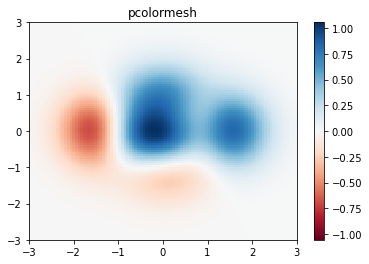

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# generate 2 2d grids for the x & y bounds
y, x = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

z = (1 - x / 2. + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2)
# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
z_min, z_max = -np.abs(z).max(), np.abs(z).max()

fig, ax = plt.subplots()

c = ax.pcolormesh(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
ax.set_title('pcolormesh')
# set the limits of the plot to the limits of the data
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

plt.show()

In [ ]:
cum

In [ ]:
lat_long_list = []
for i in cumulative['Timestamp'].unique():
    temp=[]
    for index, instance in cumulative[cumulative['Timestamp'] == i].iterrows():
        temp.append([instance['Latitude'],instance['Longitude']])
    lat_long_list.append(temp)